In [11]:
from nltk.stem import WordNetLemmatizer
import os

In [13]:
article_list = []
filename_list = []
for root,directories,files in os.walk("CLEAN_TEXTS",topdown=False) :
    for name in files :
        #print(os.path.join(root,name))
        if name.endswith(".docx") or name.endswith(".csv"):
            continue
        filename_list.append(os.path.join(root, name))
    for name in directories :
        print(os.path.join(root,name))
import random
selected_indices = list(range(len(filename_list)))
random.shuffle(selected_indices)
selected_indices=selected_indices[0:600]
selected_filename_list = list(map(filename_list.__getitem__,selected_indices))

for filename in selected_filename_list:
    fd=open(filename)
    article_list.append(fd.read())

from gensim.utils import simple_preprocess
preprocessed_docs = []
for doc in article_list:
    preprocessed_docs.append(simple_preprocess(doc, min_len=1, max_len=20))

In [20]:
from gensim.models import Word2Vec
w2v_model1 = Word2Vec(sentences=preprocessed_docs,
                      vector_size=50,
                      window=5,
                      min_count=5,
                      workers=3,
                      sg=1,
                      hs=0,
                      negative=5,
                      epochs=10)
print (w2v_model1.wv.most_similar("white"))

[('black', 0.9542071223258972), ('red', 0.9237198829650879), ('purple', 0.9023153781890869), ('yellow', 0.8955739140510559), ('sequins', 0.8757907748222351), ('green', 0.8753588199615479), ('blue', 0.874508798122406), ('blazers', 0.872437059879303), ('jumper', 0.8633934259414673), ('wraparound', 0.8621966242790222)]


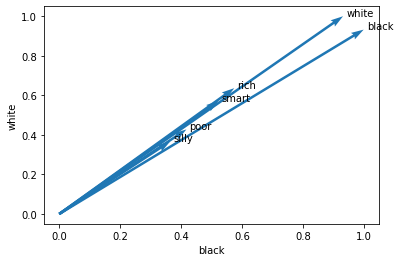

In [16]:
from whatlies import Embedding, EmbeddingSet
emb_w2v = EmbeddingSet.from_names_X(names=w2v_model1.wv.index_to_key,
                                    X=w2v_model1.wv.vectors)
(emb_w2v["silly", "smart", "rich","poor","black", "white"]
.plot(x_axis="black",
y_axis="white",
axis_metric="cosine_similarity"))
pass


In [17]:
word_frequency_dict = dict()
for doc in preprocessed_docs:
    for word in doc:#%%
        if not word in word_frequency_dict:
            word_frequency_dict[word]=1
        else:
            word_frequency_dict[word]+=1
total_number_word_occurrence = sum([word_frequency_dict[word] for word in word_frequency_dict.keys()])

In [18]:
def find_portion_word(word):
    if word not in word_frequency_dict:
        return 0
    else:
        return (word_frequency_dict[word]+0.0)/total_number_word_occurrence

In [19]:
print(find_portion_word('black'))
print(find_portion_word('white'))
print(find_portion_word('africa'))
print(find_portion_word('slave'))

0.0004730249629990269
0.000555753542037933
2.391268911027961e-05
3.432037065200994e-05


EmbSet.subset(silly,smart,rich,poor,black,white)

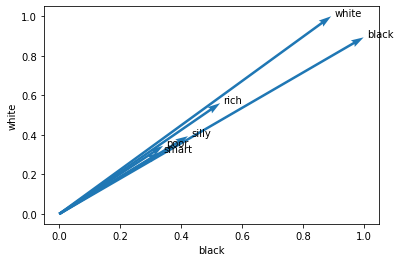

In [25]:
(emb_w2v["silly", "smart", "rich","poor","black", "white"]
.plot(x_axis="black",
y_axis="white",
axis_metric="cosine_similarity"))